In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [2]:
df = pd.read_pickle('IPL_FinalData.pkl')
#data= sns.load_dataset('IPL_FinalData.pkl')
df2 = df.reset_index()
df2.columns
df3 = df2.groupby(['Team']).sum()
#df3=df2
df3['ppg'] = df3['points']/df3['games']
df3['cost_per_point'] = df3['Spend_crores']/df3['points']
df3 = df3.drop(columns=['year'])
df3= df3.reset_index()
df3['color']=df3['Team'] #Temporary assignment will change
df3['TeamLong']=df3['Team']

In [3]:
long_to_short_names = {}
team_to_colors = {}
for team in df3.Team:
    if team == 'Pune Warriors India':
        short_name = 'Pune-W'
        color = 'mistyrose'
    elif team == 'Delhi Capitals':
        short_name = 'Delhi'
        color = 'magenta'
    elif team == 'Royal Challengers Bangalore':
        short_name = 'RCB'
        color = 'red'
    elif team == 'Rising Pune Supergiant':
        short_name = 'Pune-S'
        color = 'khaki'
    elif team == 'Gujarat Lions':
        short_name = 'Guj'
        color = 'darkkhaki'
    elif team == 'Kings XI Punjab':
        short_name = 'KXIP'
        color = 'dimgray'
    elif team == 'Kolkata Knight Riders':
        short_name = 'KKR'
        color = 'black'
    elif team == 'Mumbai Indians':
        short_name = 'MI'
        color = 'blue'
    elif team == 'Sunrisers Hyderabad':
        short_name = 'SRH'
        color = 'orange'
    elif team == 'Rajasthan Royals':
        short_name = 'RR'
        color = 'hotpink'
    elif team == 'Chennai Super Kings':
        short_name = 'CSK'
        color = 'yellow'
        
    long_to_short_names[team] = short_name
    team_to_colors[team]= color    
    
df3 = df3.replace({'Team':long_to_short_names, 'color':team_to_colors})
df3 = df3.sort_values(['cost_per_point'],ascending=False)

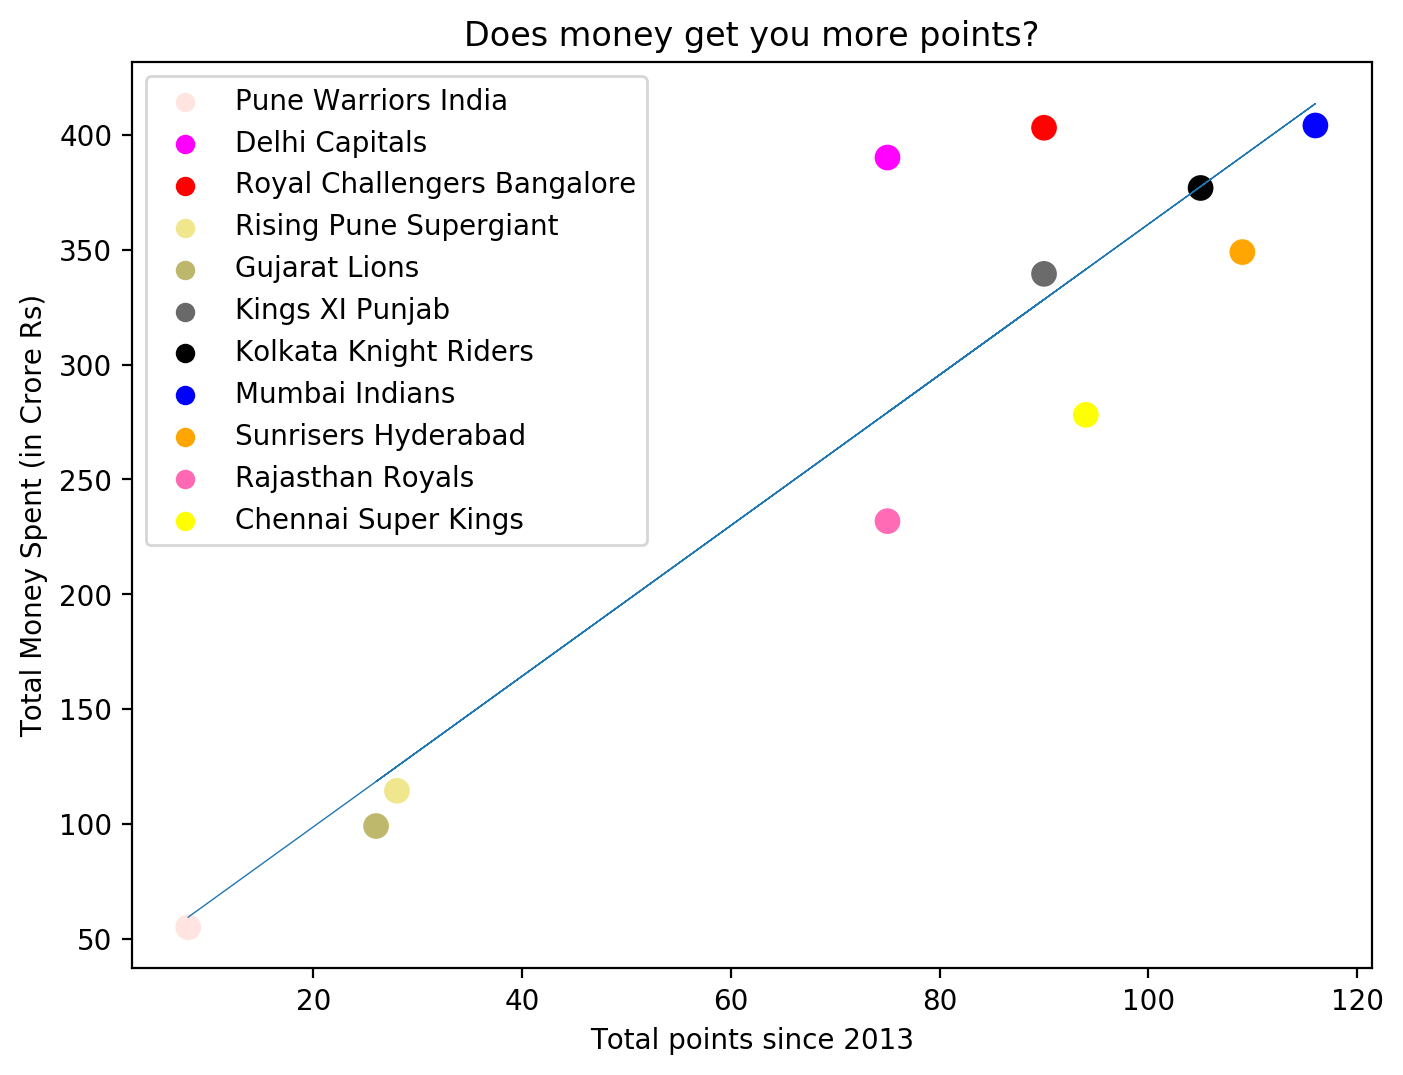

In [4]:
#Result 1: Spending v/s Points
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
g = sns.scatterplot(x="points", y="Spend_crores", s=100, alpha=0.99,hue="TeamLong",
              data=df3, palette=team_to_colors,legend='brief')
ax.legend().set_title('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.ylabel("Total Money Spent (in Crore Rs)")
plt.xlabel("Total points since 2013")
plt.title("Does money get you more points?") 
b, m = polyfit(df3.points, df3.Spend_crores, 1)
plt.plot(df3.points, b + m * df3.points, '-',linewidth=0.5)
plt.savefig('res1.png')

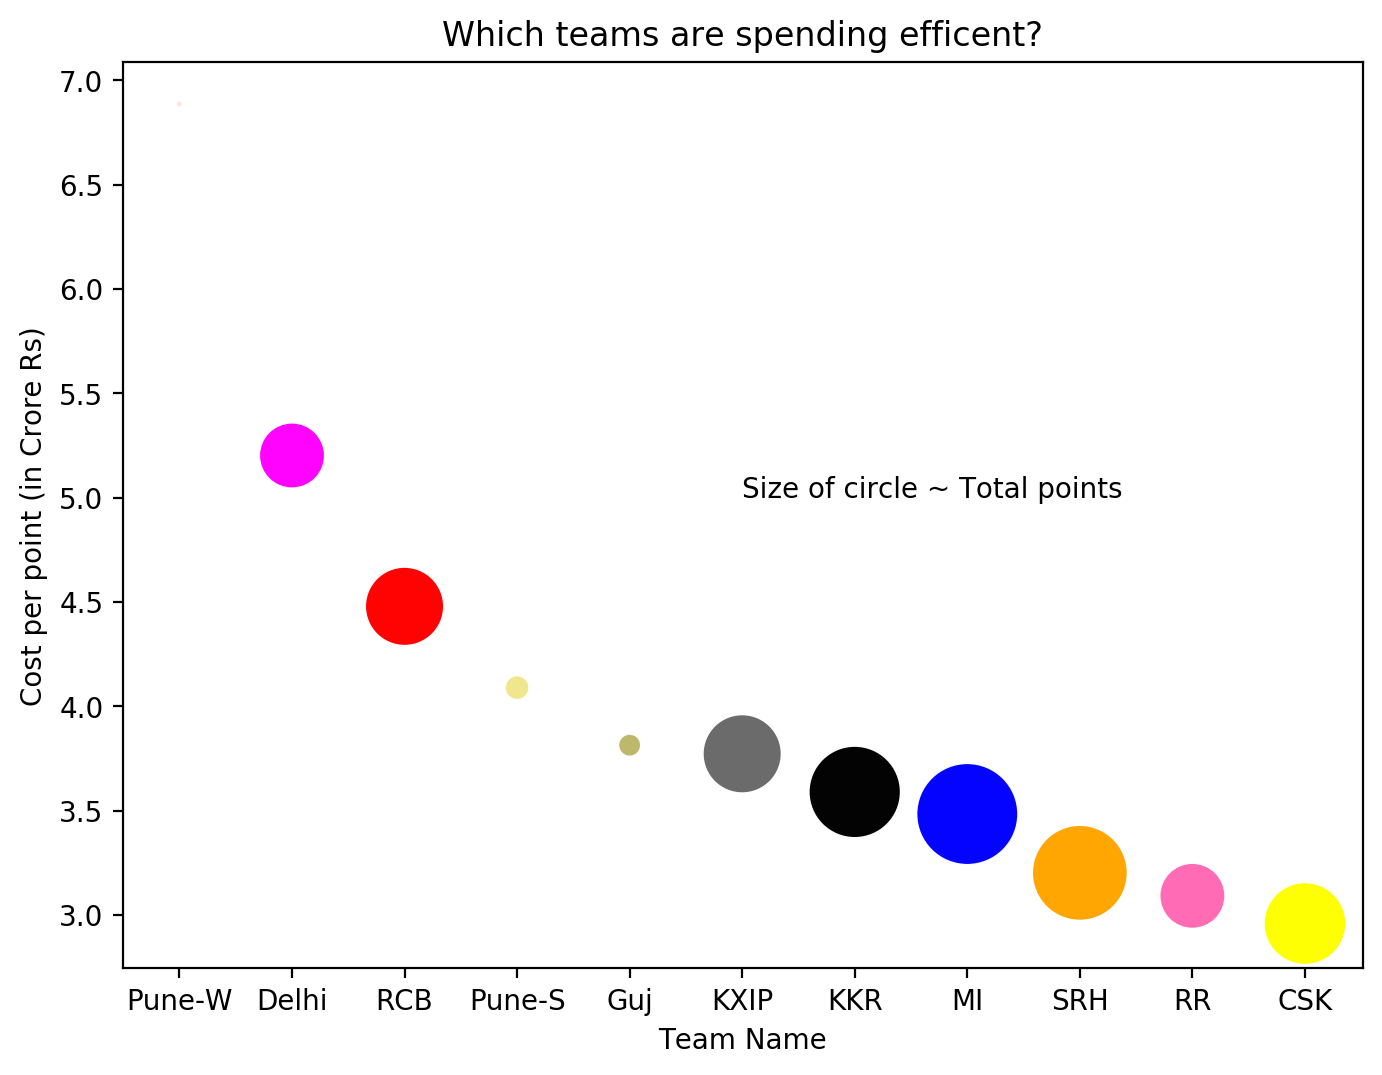

In [5]:
#Result 2: Spending v/s Points
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
sns.scatterplot(x="Team", y="cost_per_point", s=df3.points*df3.points/10, alpha=0.99,hue="TeamLong",
              data=df3, palette=team_to_colors,legend=False)
plt.ylabel("Cost per point (in Crore Rs)")
plt.xlabel("Team Name")
plt.title("Which teams are spending efficent?") 
plt.text(5, 5, 'Size of circle ~ Total points')
plt.savefig('res2.png')

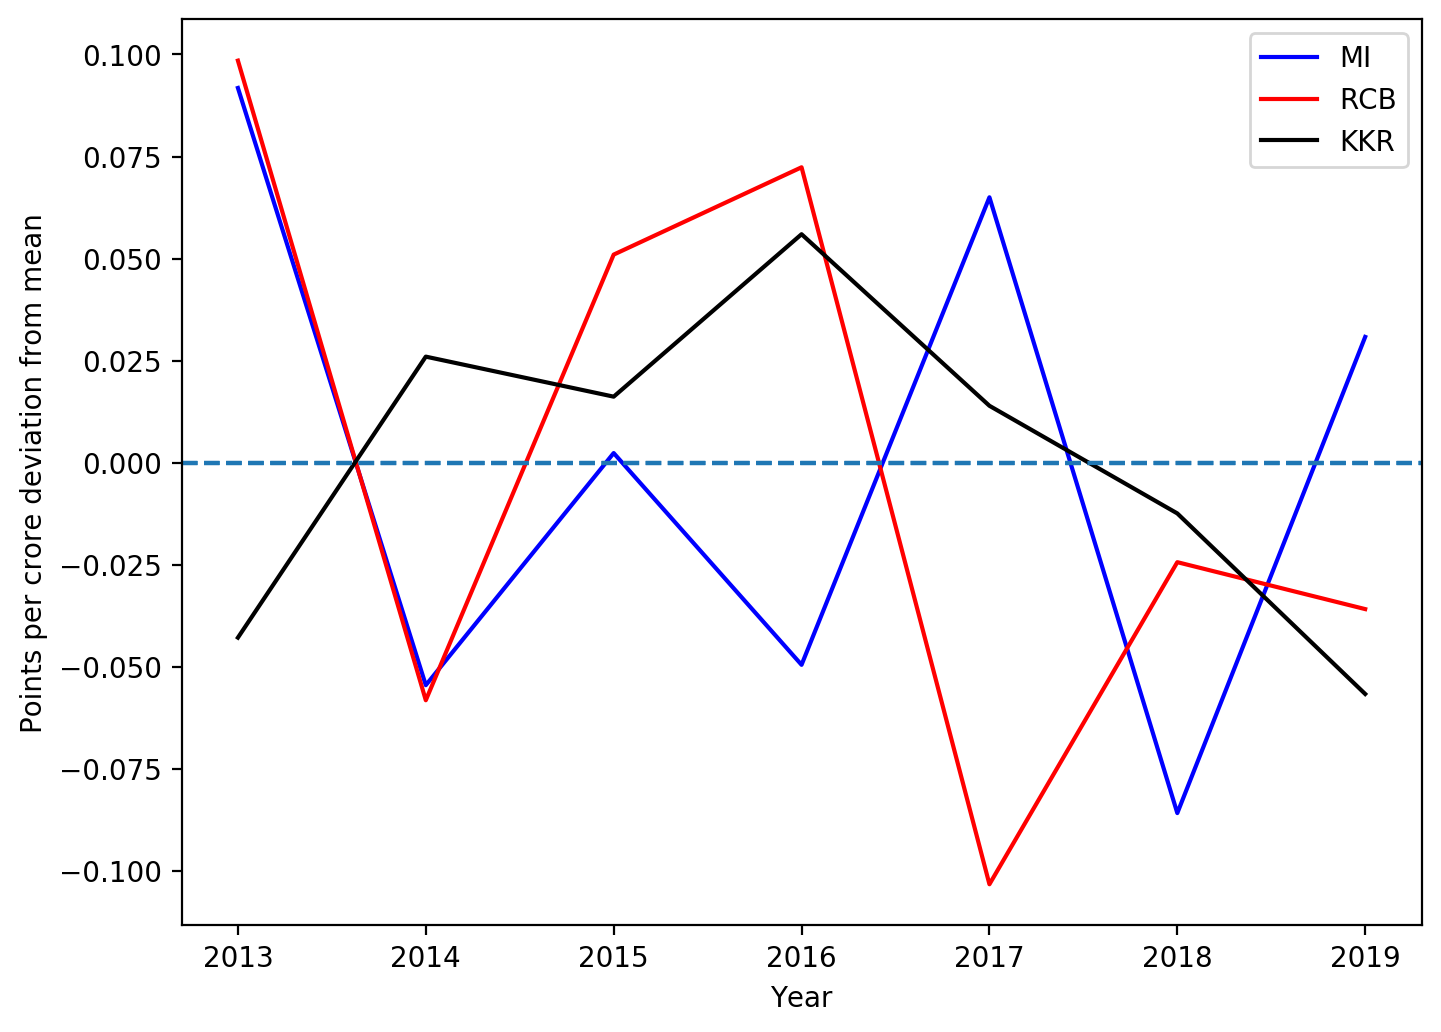

In [18]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
df4 = df
df4['ppc']=df4['points']/df4.Spend_crores
yLeague = df4.groupby(level=[0]).sum()['ppc']
teams = set(df4.index.get_level_values(level=1))
teams = ['Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders']
yMeans = df4.ppc.groupby(level=[1]).mean()
for team in teams:
    yi  = df4.ppc.groupby(level=[1,0]).mean()[team]
    yim = df4.ppc.groupby(level=[1]).mean()[team]
    sns.lineplot(data = yi-yim,color=team_to_colors[team],label=long_to_short_names[team])
    plt.legend()
    plt.axhline(0.0, ls='--')
    plt.ylabel('Points per crore deviation from mean')
    plt.xlabel('Year')
    plt.savefig('res4')

In [20]:
df4

games  points       ppg  Spend_crores  \
year Team                                                                 
2013 Gujarat Lions                    0       0  0.000000      0.000000   
     Kolkata Knight Riders           16      12  0.750000     50.796954   
     Royal Challengers Bangalore     16      18  1.125000     55.659716   
     Mumbai Indians                  16      22  1.375000     57.915392   
     Pune Warriors India             16       8  0.500000     55.094807   
     Rajasthan Royals                16      20  1.250000     16.865046   
     Delhi Capitals                  16       6  0.375000     55.998534   
     Chennai Super Kings             16      22  1.375000     48.738869   
     Rising Pune Supergiant           0       0  0.000000      0.000000   
     Kings XI Punjab                 16      16  1.000000     22.955761   
     Sunrisers Hyderabad             16      20  1.250000     25.939454   
2014 Gujarat Lions                    0       0  0.000000      0.000000   
     Kolkata Knight Riders           14      18  1.285714     59.000000   
     Royal Challengers Bangalore     14      10  0.714286     60.000000   
     Mumbai Indians                  14      14  1.000000     59.950000   
     Pune Warriors India              0       0  0.000000      0.000000   
     Rajasthan Royals                14      14  1.000000     54.450000   
     Delhi Capitals                  14       4  0.285714     60.000000   
     Chennai Super Kings             14      18  1.285714     59.800000   
     Rising Pune Supergiant           0       0  0.000000      0.000000   
     Kings XI Punjab                 14      22  1.571429     55.900000   
     Sunrisers Hyderabad             14      12  0.857143     59.000000   
2015 Gujarat Lions                    0       0  0.000000      0.000000   
     Kolkata Knight Riders           14      15  1.071429     50.800000   
     Royal Challengers Bangalore     14      16  1.142857     58.000000   
     Mumbai Indians                  14      16  1.142857     55.095000   
     Pune Warriors India              0       0  0.000000      0.000000   
     Rajasthan Royals                14      16  1.142857     49.350000   
     Delhi Capitals                  14      11  0.785714     58.650000   
     Chennai Super Kings             14      18  1.285714     59.300000   
...                                 ...     ...       ...           ...   
2017 Mumbai Indians                  14      20  1.428571     56.645000   
     Pune Warriors India              0       0  0.000000      0.000000   
     Rajasthan Royals                 0       0  0.000000      0.000000   
     Delhi Capitals                  14      12  0.857143     50.950000   
     Chennai Super Kings              0       0  0.000000      0.000000   
     Rising Pune Supergiant          14      18  1.285714     59.700000   
     Kings XI Punjab                 14      14  1.000000     46.100000   
     Sunrisers Hyderabad             14      17  1.214286     47.750000   
2018 Gujarat Lions                    0       0  0.000000      0.000000   
     Kolkata Knight Riders           14      16  1.142857     60.000000   
     Royal Challengers Bangalore     14      12  0.857143     59.850000   
     Mumbai Indians                  14      12  0.857143     59.350000   
     Pune Warriors India              0       0  0.000000      0.000000   
     Rajasthan Royals                14      14  1.000000     58.350000   
     Delhi Capitals                  14      10  0.714286     58.400000   
     Chennai Super Kings             14      18  1.285714     53.500000   
     Rising Pune Supergiant           0       0  0.000000      0.000000   
     Kings XI Punjab                 14      12  0.857143     59.900000   
     Sunrisers Hyderabad             14      18  1.285714     59.350000   
2019 Gujarat Lions                    0       0  0.000000      0.000000   
     Kolkata Knight Riders           14      12  0.857143  

In [12]:
yLeague

year
2013    4.297132
2014    1.927016
2015    2.071371
2016    2.154182
2017    2.126054
2018    1.920591
2019    2.032026
Name: ppc, dtype: float64